In [1]:
!pip install -q seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.6.0


In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?',comment='\t',
                          sep=' ', skipinitialspace=True)

In [5]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
dataset.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
dataset=dataset.dropna() # remove rows which has null null values

In [8]:
dataset.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
dataset['Origin']=dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [10]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [11]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [12]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

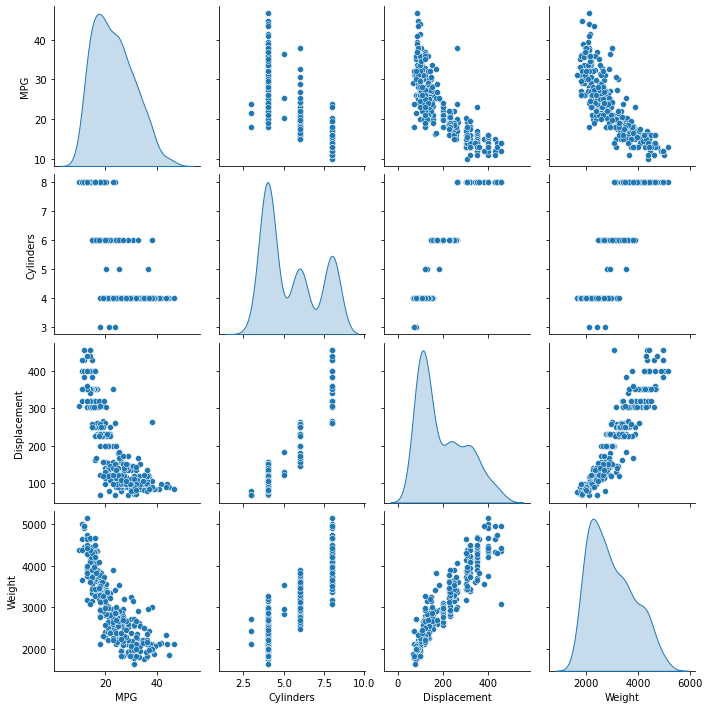

In [13]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')


In [14]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [15]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [16]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [17]:
normalizer = preprocessing.Normalization(axis=-1)

In [18]:
normalizer.adapt(np.array(train_features))

In [19]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [20]:
first = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [21]:
horsepower = np.array(train_features['Horsepower'])

In [22]:
horsepower_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [23]:
horsepower_normalizer(train_features['Horsepower'])

<tf.Tensor: shape=(314,), dtype=float32, numpy=
array([-0.785, -0.444,  1.449, -1.101, -0.996, -0.391, -1.18 , -0.996,
       -0.259, -0.444, -1.18 ,  1.975, -0.444,  1.187,  1.318, -0.785,
        0.266,  1.187, -0.391, -0.391,  0.634,  0.135, -0.391,  0.135,
       -0.759,  1.581, -0.338, -0.444, -0.128,  1.187,  0.45 , -0.812,
       -0.759, -0.996,  0.135, -0.391, -1.048,  1.187,  1.187,  3.027,
        1.581, -0.996, -0.785,  0.924, -0.706,  1.16 , -0.549,  1.187,
        1.055, -0.128, -0.785,  1.712,  2.501, -0.864, -0.706, -0.759,
       -0.444,  0.003, -1.364, -0.496, -0.259, -0.785, -0.89 ,  2.449,
       -0.943,  0.003,  2.895, -0.444, -0.47 , -1.048, -1.18 , -0.969,
        0.634,  1.055, -0.259,  1.265, -0.917,  1.055, -0.969, -0.917,
       -0.128, -0.917, -0.628, -0.259,  3.158, -0.391, -0.207, -0.128,
       -1.048,  0.135, -0.417,  1.187,  0.135, -0.259, -0.522, -0.207,
       -1.18 , -0.444, -1.39 , -0.917,  2.449, -0.89 , -0.391, -0.864,
       -1.101,  0.266, -0.391

In [24]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [25]:

horsepower_model.predict(horsepower[:10])

array([[ 0.341],
       [ 0.193],
       [-0.629],
       [ 0.478],
       [ 0.432],
       [ 0.17 ],
       [ 0.512],
       [ 0.432],
       [ 0.113],
       [ 0.193]], dtype=float32)

In [26]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [30]:

history = horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    epochs=100,
    # suppress logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 0s 10ms/step - loss: 3.8032 - val_loss: 4.1848
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8035 - val_loss: 4.1745
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8048 - val_loss: 4.1808
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8036 - val_loss: 4.1898
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8057 - val_loss: 4.2056
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8061 - val_loss: 4.1971
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 3.8061 - val_loss: 4.1755
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8041 - val_loss: 4.1696
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 3.8043 - val_loss: 4.1924
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 3.8041 - val_loss: 4.1874
Epoch 11/100
8/8 [==========

8/8 [==============================] - 0s 5ms/step - loss: 3.8064 - val_loss: 4.2271
Epoch 85/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8086 - val_loss: 4.2053
Epoch 86/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8054 - val_loss: 4.1881
Epoch 87/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8106 - val_loss: 4.1448
Epoch 88/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8058 - val_loss: 4.1681
Epoch 89/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8049 - val_loss: 4.1959
Epoch 90/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8081 - val_loss: 4.1931
Epoch 91/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8056 - val_loss: 4.1944
Epoch 92/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8061 - val_loss: 4.1617
Epoch 93/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8042 - val_loss: 4.1847
Epoch 94/100
8/8 [===============

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.806028,4.189645,95
96,3.805310,4.180504,96
97,3.804961,4.201918,97
98,3.802690,4.189967,98
99,3.804643,4.187640,99


In [32]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

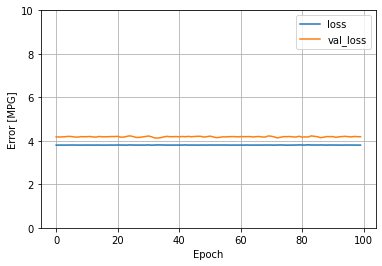

In [33]:
plot_loss(history)

In [34]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [35]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [36]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

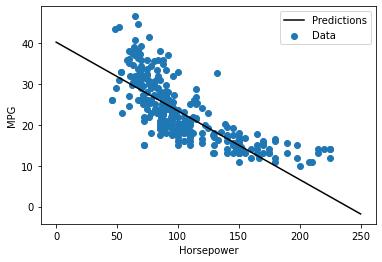

In [37]:
plot_horsepower(x,y)

In [38]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [41]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.771],
       [ 0.683],
       [-0.122],
       [ 0.22 ],
       [ 0.666],
       [-0.217],
       [ 0.182],
       [-0.749],
       [ 0.578]], dtype=float32)>

In [42]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [43]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Wall time: 4.13 s


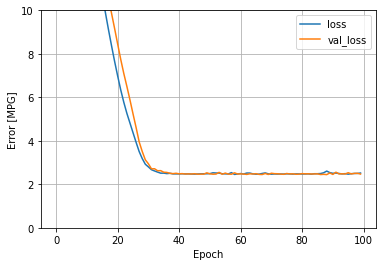

In [44]:
plot_loss(history)

In [45]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [46]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [47]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)


In [48]:
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [49]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 4.6 s


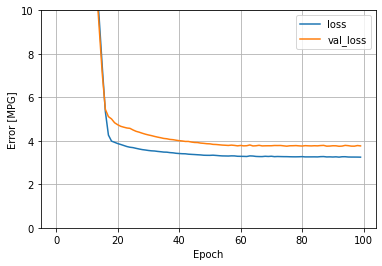

In [50]:
plot_loss(history)

In [51]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [52]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 4.76 s


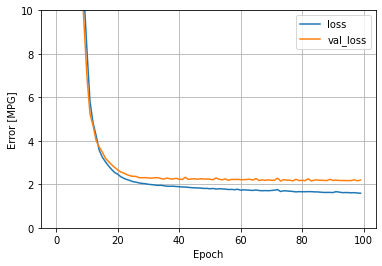

In [53]:
plot_loss(history)

In [54]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)


In [55]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.637692
linear_model,2.447468
dnn_model,1.723355


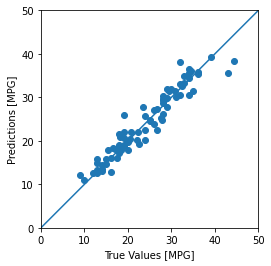

In [56]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [57]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


In [58]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [59]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.637692
linear_model,2.447468
dnn_model,1.723355
reloaded,1.723355
